In [1]:
import matplotlib.pyplot as plt
from b_funks import load
from uncertainties.unumpy import nominal_values as nom
from uncertainties.unumpy import std_devs as err

In [2]:
odat = load.b_data(None)

In [3]:
odat[('denom', 'BO4_sqrtCO3')] = (odat.csys_mid.BO4 / odat.csys_mid.CO3**0.5)
odat[('denom', 'BT_DIC')] = (odat.csys_mid.BT / odat.csys_mid.DIC)
odat[('denom', 'BT')] = odat.csys_mid.BT

for d in odat.denom.columns:
    odat[('KB', d)] = odat[('Measured', 'B/Caf')] / odat[('denom', d)]

In [4]:
# sub = odat.loc[odat.csys_mid.BT < 500]
sub = odat.loc[~odat.Measured.Species.str.contains('lessonii')]
species = sub.Measured.Species.unique()

Text(0.5, 0, '[Mg]')

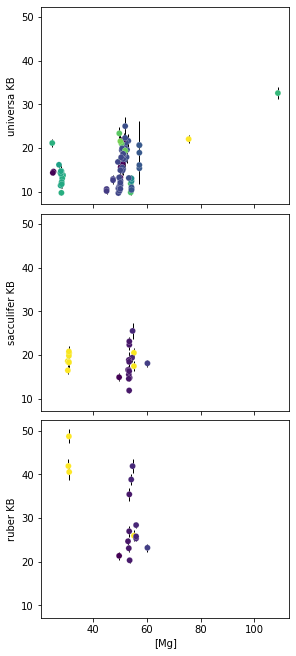

In [7]:
fig, axs = plt.subplots(len(species), 1, figsize=[4, 3*len(species)], constrained_layout=True, sharex=True, sharey=True)

for s, ax in zip(species, axs):
    ssub = sub.loc[sub.Measured.Species == s]
    
    x = ssub[('Measured', '[Mg]sw')]
#     x = ssub[('csys_mid', 'DIC')]
#     y = nom(ssub[('KB', 'BT')])
#     y_err = err(ssub[('KB', 'BT')])
    y = nom(ssub[('KB', 'BO4_sqrtCO3')])
    y_err = err(ssub[('KB', 'BO4_sqrtCO3')])
    c = ssub[('Measured', '[Ca]sw')]
#     c = ssub.Measured.Salinity
    if c is not None:
        vmin = c.min()
        vmax = c.max()
    else:
        vmin = vmax = None
    
    ax.scatter(x, y, c=c, lw=0.2, edgecolor='w', vmin=vmin, vmax=vmax)
    ax.errorbar(x, y, y_err, lw=0, elinewidth=1, zorder=-1, color='k')
    ax.set_ylabel(f'{s} KB')
axs[-1].set_xlabel('[Mg]')

(array([3., 3., 1., 0., 0., 1., 1., 3., 0., 1.]),
 array([20.32311314, 23.16039183, 25.99767052, 28.83494921, 31.6722279 ,
        34.50950659, 37.34678528, 40.18406398, 43.02134267, 45.85862136,
        48.69590005]),
 <BarContainer object of 10 artists>)

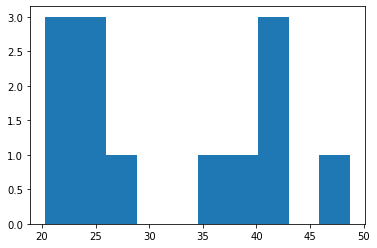

In [8]:
plt.hist(nom(odat.loc[(odat.Measured.Species == 'ruber') & (odat.Measured.Type == 'pink'), ('KB', 'BO4_sqrtCO3')]))

In [9]:
# which are these data points?
odat.loc[(odat.KB.BO4_sqrtCO3 > 30) & (odat.Measured.Species == 'ruber'), 'Measured']

,Year,Temp,Salinity,[Mg]sw,[Ca]sw,[B]sw,Mg/Casw,Mg/Caf,Mg/Caf_err,B/CaCAM,...,Notes,size um,size um sd,test thickness um,test thickness um sd,weight ug,weight ug sd,who,KB,KB_HCO3
74,2015,26.00,36.00,31.00,20.80,387,1.49,NaN,NaN,NaN,...,NaN,496.0,128.0,NaN,NaN,11.0,1.0,Haynes et al. (2019),1083+/-35,1014+/-33
75,2015,26.00,36.00,30.80,20.80,383,1.48,NaN,NaN,NaN,...,NaN,487.0,42.0,NaN,NaN,10.0,1.0,Haynes et al. (2019),(1.11+/-0.05)e+03,(1.01+/-0.04)e+03
76,2015,26.00,36.00,31.10,20.80,388,1.50,NaN,NaN,NaN,...,NaN,432.0,91.0,NaN,NaN,14.0,2.0,Haynes et al. (2019),(1.30+/-0.06)e+03,(1.13+/-0.05)e+03
78,2015,26.05,35.80,54.20,10.80,218,5.02,NaN,NaN,NaN,...,NaN,464.0,101.0,NaN,NaN,15.0,1.0,Haynes et al. (2019),1020+/-35,929+/-31
79,2015,26.05,35.90,54.70,10.90,833,5.02,NaN,NaN,NaN,...,NaN,522.0,47.0,NaN,NaN,16.0,1.0,Haynes et al. (2019),(1.14+/-0.04)e+03,(1.03+/-0.04)e+03
118,2010,25.74,35.52,53.48,10.35,422,5.16,NaN,NaN,NaN,...,low pH,527.2,77.8,NaN,NaN,21.5,11.3,Allen et al. (2012),642+/-26,607+/-24


In [15]:
odat.loc[(odat.KB.BO4_sqrtCO3 > 30) & (odat.Measured.Species == 'ruber'), 'csys_mid']

,DIC,TA,CO3,HCO3,CO2,pHtot,BO4,BO3,BT,KspC,H,Omega,del_CO3,BT_DIC
74,1957.778413,2076.0,97.724452,1834.308866,25.745095,7.700191,43.443319,343.556681,387,4.239150e-07,1.994385e-08,4.794991,20.380530,0.197673
75,1959.374752,2158.0,147.866775,1795.233491,16.274486,7.890075,62.686845,320.313155,383,4.234648e-07,1.288026e-08,7.263009,20.358885,0.195471
76,1960.939052,2310.0,249.787531,1702.471736,8.679785,8.139918,100.196080,287.803920,388,4.241402e-07,7.245726e-09,12.249677,20.391356,0.197864
78,1968.509828,2156.0,161.075021,1791.803897,15.630909,7.899294,36.949693,181.050307,218,4.441385e-07,1.260973e-08,3.916820,41.123932,0.110744
79,1984.181238,2307.0,178.334973,1791.650104,14.196161,7.940541,153.046550,679.953450,833,4.471671e-07,1.146723e-08,4.347036,41.024502,0.419821
118,2006.598744,2061.0,64.809496,1898.789057,43.000191,7.487305,30.688959,391.311041,422,4.368656e-07,3.256077e-08,1.535434,42.209241,0.210306


In [10]:
import statsmodels.api as sm

t, p, df = sm.stats.ttest_ind(nom(odat.loc[[74,75,76], ('KB', 'BO4_sqrtCO3')]), nom(odat.loc[[78, 79, 118], ('KB', 'BO4_sqrtCO3')]))
p

/usr/lib/python3.10/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


0.18589330863786616

In [12]:
import seaborn as sns

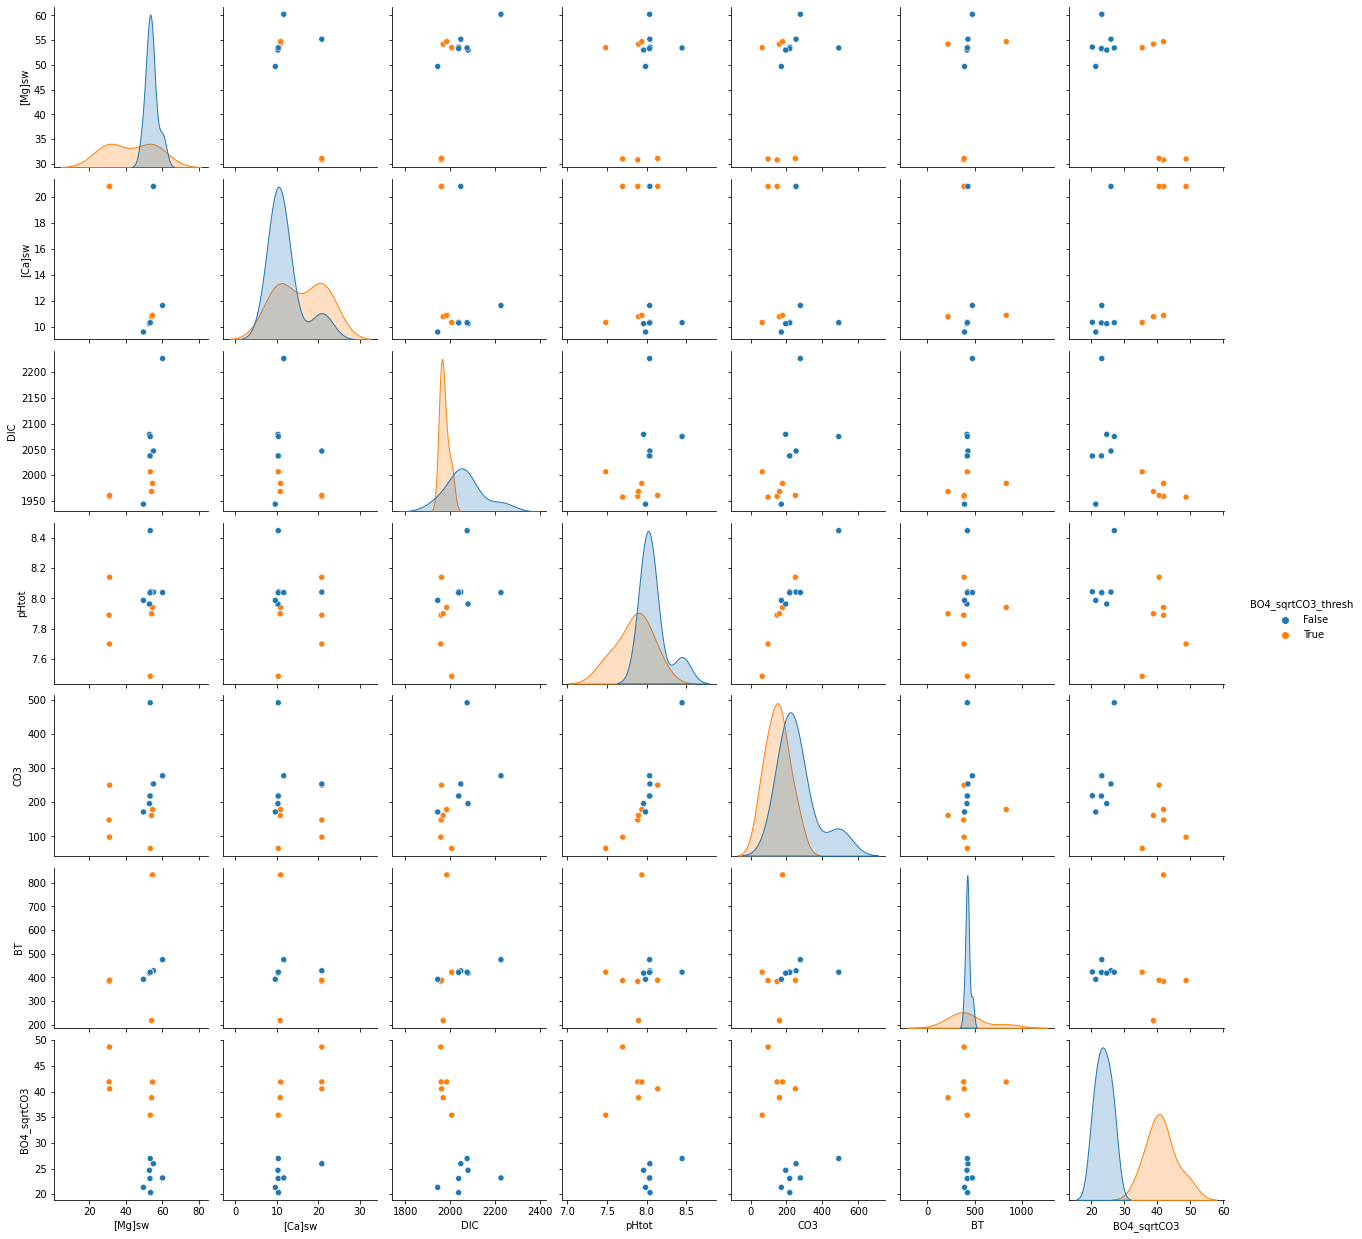

In [13]:
sub = odat.loc[(odat.Measured.Species == 'ruber') & (odat.Measured.Type == 'pink'),[
    ('Measured', '[Mg]sw'),
    ('Measured', '[Ca]sw'),
    ('csys_mid', 'DIC'),
    ('csys_mid', 'pHtot'),
    ('csys_mid', 'CO3'),
    ('csys_mid', 'BT'),
    ('KB', 'BO4_sqrtCO3')
]]
sub.columns = sub.columns.droplevel(0)
sub['BO4_sqrtCO3'] = nom(sub.BO4_sqrtCO3)

sub['BO4_sqrtCO3_thresh'] = sub['BO4_sqrtCO3'] > 30
sns.pairplot(sub, hue='BO4_sqrtCO3_thresh')

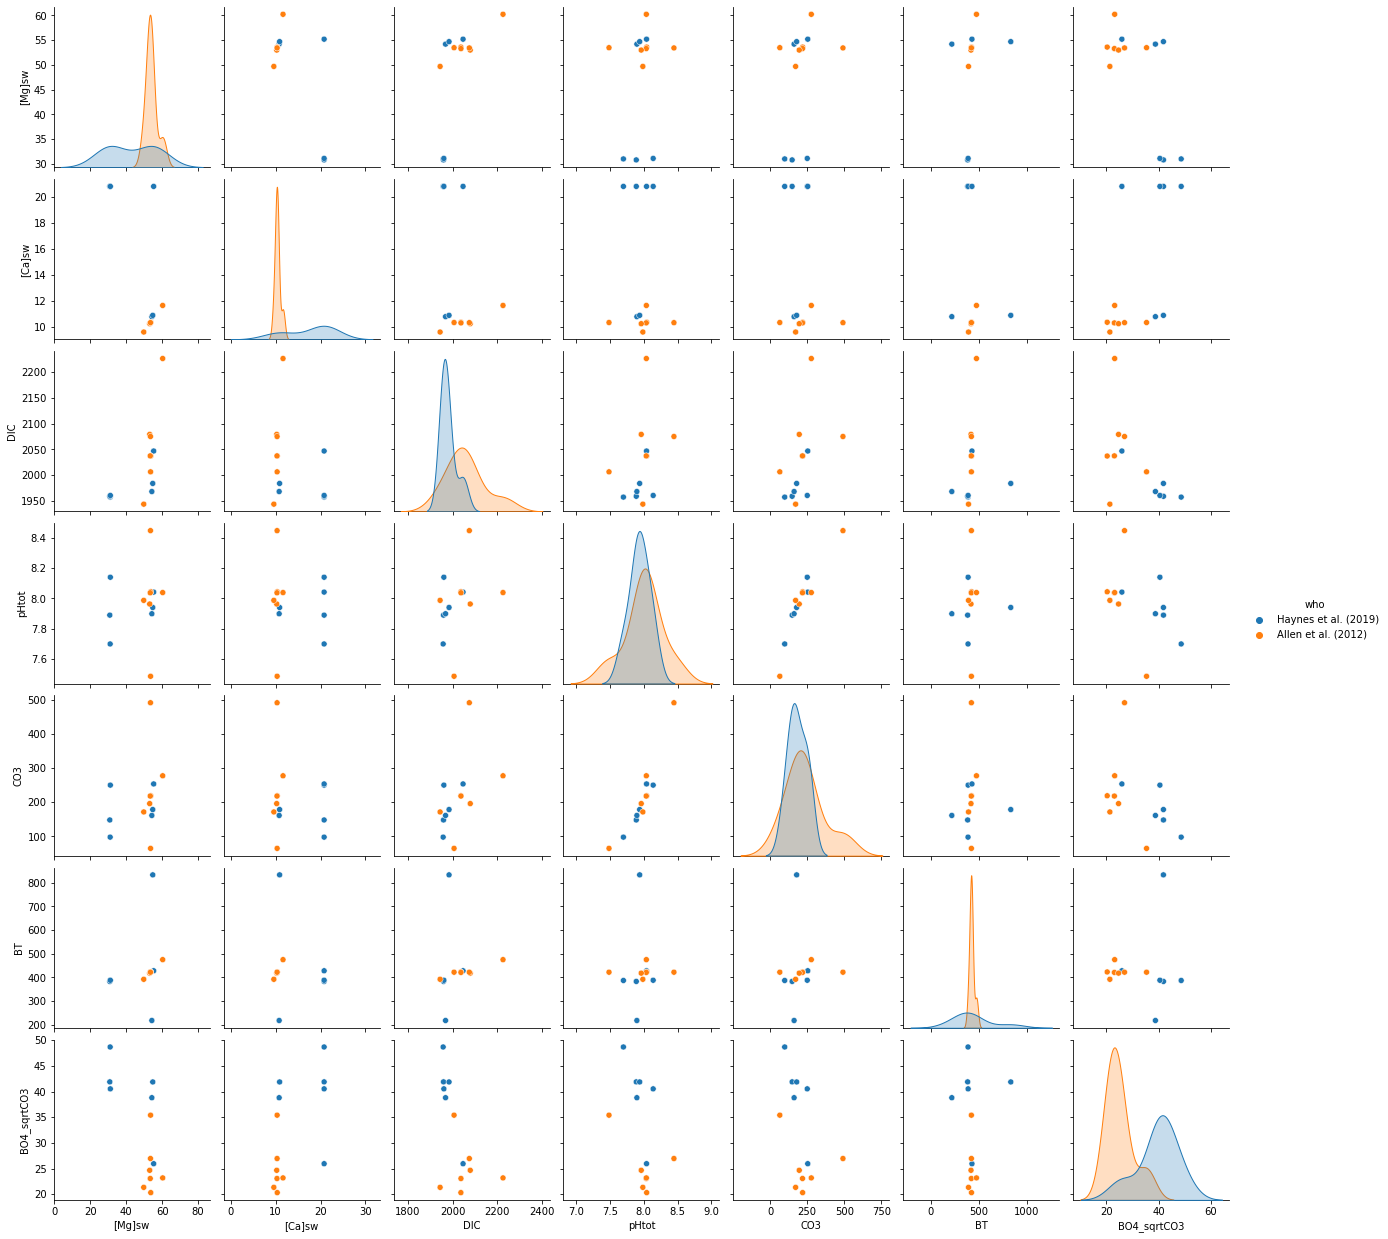

In [176]:
sub = odat.loc[(odat.Measured.Species == 'ruber') & (odat.Measured.Type == 'pink'),[
    ('Measured', '[Mg]sw'),
    ('Measured', '[Ca]sw'),
    ('csys_mid', 'DIC'),
    ('csys_mid', 'pHtot'),
    ('csys_mid', 'CO3'),
    ('csys_mid', 'BT'),
    ('KB', 'BO4_sqrtCO3'),
    ('Measured', 'who')
]]
sub.columns = sub.columns.droplevel(0)
sub['BO4_sqrtCO3'] = nom(sub.BO4_sqrtCO3)

sns.pairplot(sub, hue='who')